In [27]:
import numpy as np
emb = np.load('./embedding.npy')
print(emb.shape)
lab = np.argmax(np.load('./labels.npy'), axis=1)
print(lab.shape)

emb_test = np.load('./embedding_test.npy')
print(emb_test.shape)
lab_test = np.argmax(np.load('./labels_test.npy'), axis=1)
print(lab_test.shape)

with open('filenames_test.txt', 'r') as f:
    filenames = f.readlines()
    
print(len(filenames))

emb_real_test = np.load('embedding_real_test.npy')
print(emb_real_test.shape)

(22246, 200)
(22246,)
(3081, 200)
(3081,)
158538
(158538, 200)


In [71]:
from sklearn.decomposition import PCA
ncomp = 6
pca = PCA(ncomp)
pca.fit(emb)

y = pca.transform(emb)
print(y.shape)
print(pca.explained_variance_ratio_)

y_real_test = pca.transform(emb_real_test)

(22246, 6)
[ 0.12770084  0.10436223  0.09682223  0.06180697  0.05396197  0.04732651]


In [9]:
num_classes

12

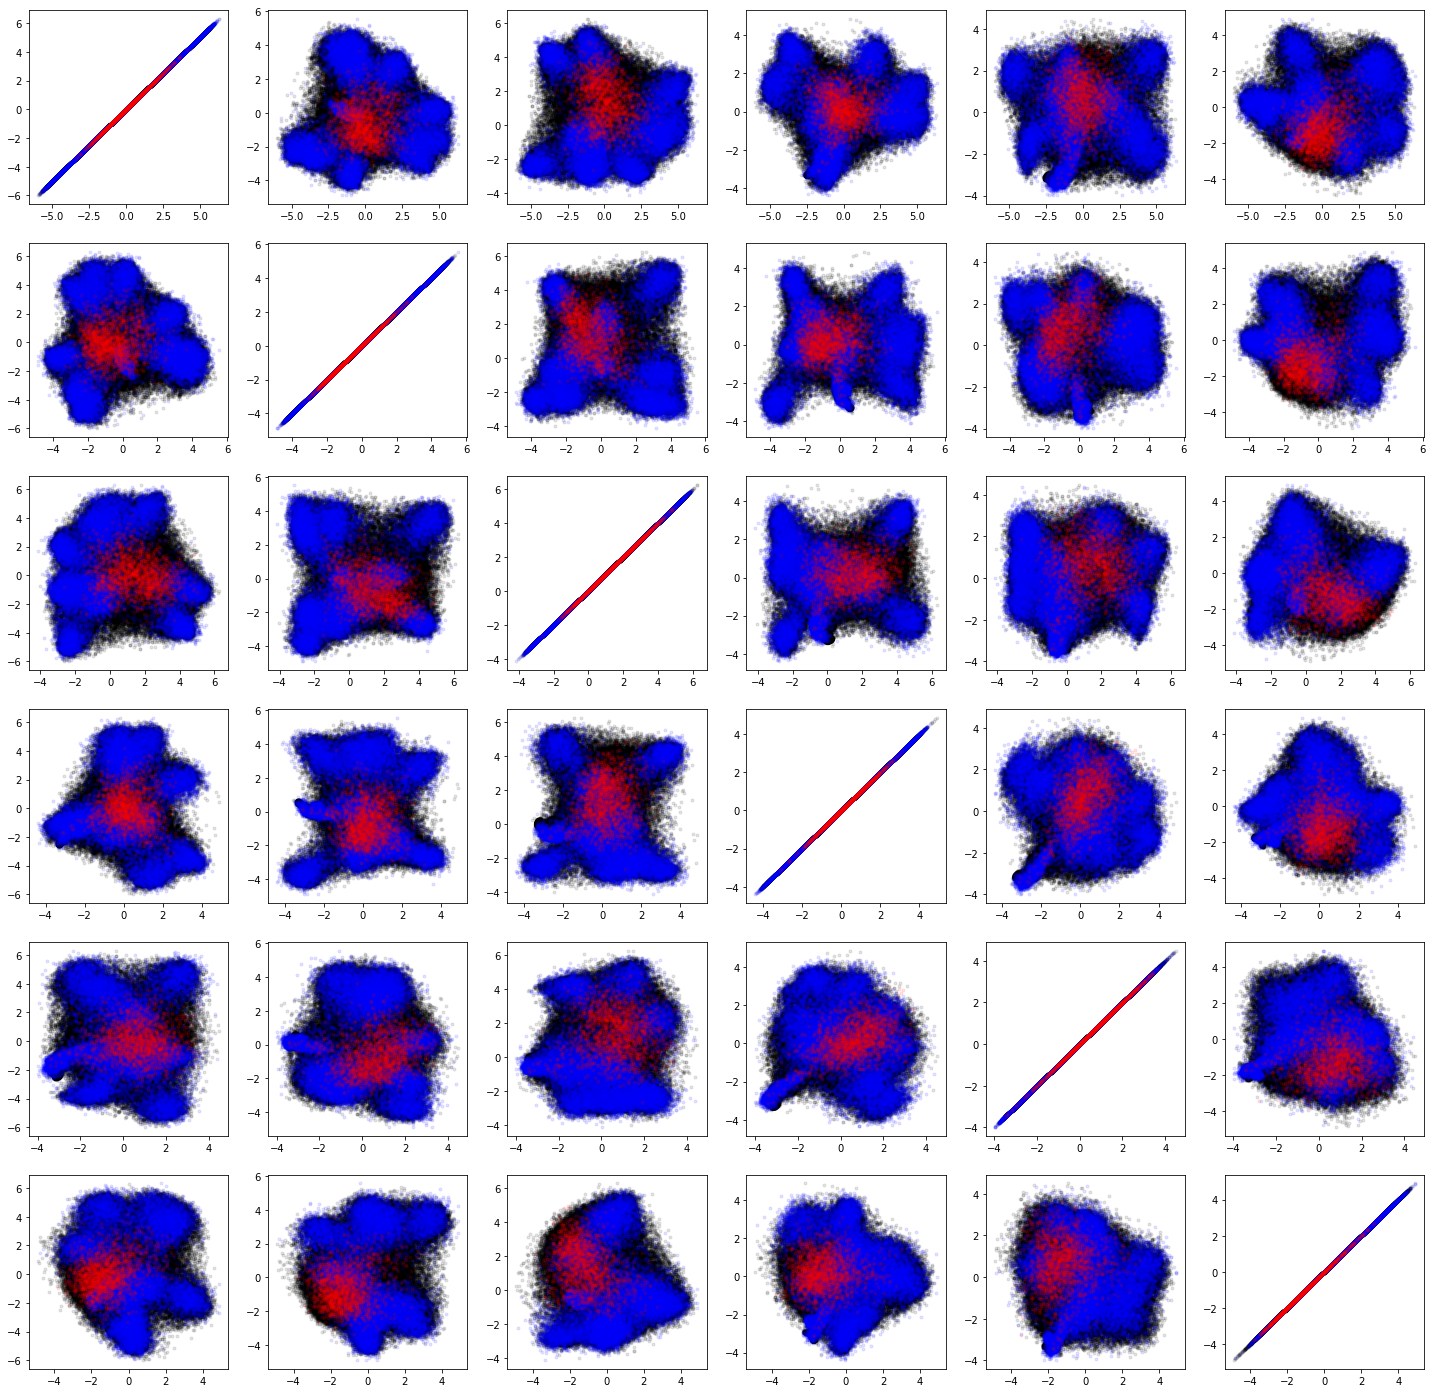

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

known = lab != 1
unknown = lab == 1
classes = np.unique(lab)
num_classes = len(classes)
class_idx = []
for c in classes:
    class_idx.append(lab == c)

if True:
    plt.figure(figsize=(25,25))
    cnt = 1
    for i in range(ncomp):
        for j in range(ncomp):
            plt.subplot(ncomp,ncomp,cnt)
            plt.plot(y_real_test[:, i], y_real_test[:, j], '.k', alpha=0.1)
            plt.plot(y[known, i], y[known, j], '.b', alpha=0.1)
            plt.plot(y[unknown, i], y[unknown, j], '.r', alpha=0.1)
            
            cnt +=1 
            
else:
    plt.figure(figsize=(25,25))
    clrlist=['b','r','g','m','c','k','y', 'orange', 'darkgreen', 'darkblue', 'purple', 'r']
    cnt = 1
    for i in range(ncomp):
        for j in range(ncomp):
            plt.subplot(ncomp,ncomp,cnt)
            for c in range(num_classes):
                plt.plot(y[class_idx[c], i], y[class_idx[c], j], '.', color=clrlist[c], alpha=0.1)
            cnt +=1 

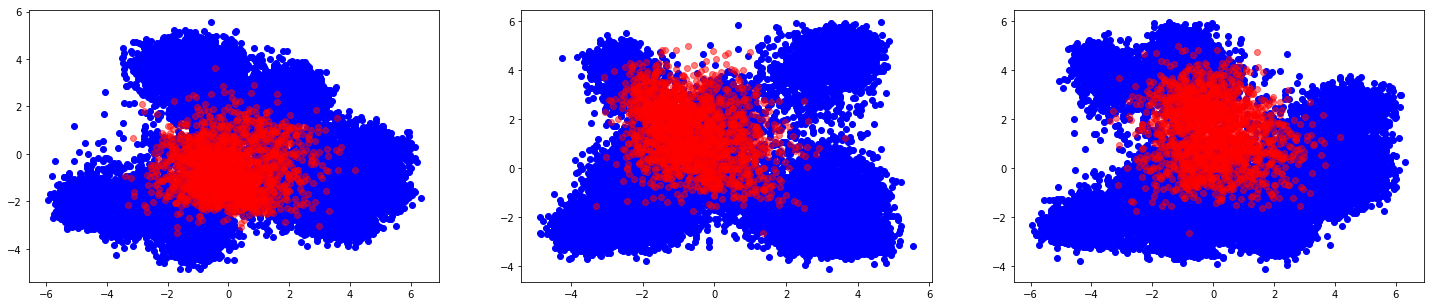

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(3, perplexity=30, early_exaggeration=12, learning_rate=200, verbose=1)
y = tsne.fit_transform(emb)
y.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22246 samples in 0.481s...
[t-SNE] Computed neighbors for 22246 samples in 161.509s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22246
[t-SNE] Computed conditional probabilities for sample 2000 / 22246
[t-SNE] Computed conditional probabilities for sample 3000 / 22246
[t-SNE] Computed conditional probabilities for sample 4000 / 22246
[t-SNE] Computed conditional probabilities for sample 5000 / 22246
[t-SNE] Computed conditional probabilities for sample 6000 / 22246
[t-SNE] Computed conditional probabilities for sample 7000 / 22246
[t-SNE] Computed conditional probabilities for sample 8000 / 22246
[t-SNE] Computed conditional probabilities for sample 9000 / 22246
[t-SNE] Computed conditional probabilities for sample 10000 / 22246
[t-SNE] Computed conditional probabilities for sample 11000 / 22246
[t-SNE] Computed conditional probabilities for sample 12000 / 22246
[t-SNE] Computed conditional probabilities for s

KeyboardInterrupt: 

In [84]:
if False:
    ncomp = 20
    pca2 = PCA(ncomp)
    pca2.fit(emb)
    emb_proj = pca2.transform(emb)
    emb_real_test_proj = pca2.transform(emb_real_test)
else:
    emb_proj = emb
    emb_real_test_proj = emb_real_test

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, n_jobs=5, verbose=1, oob_score=True)
rf.fit(emb_proj, lab)


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   10.8s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:   11.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=5,
            oob_score=True, random_state=None, verbose=1, warm_start=False)

In [85]:
def build_submission(labels):
    names = dict()
    names[0] = 'silence'
    names[1] = 'unknown'
    names[2] = 'yes'
    names[3] = 'no'
    names[4] = 'up'
    names[5] = 'down'
    names[6] = 'left'
    names[7] = 'right'
    names[8] = 'on'
    names[9] = 'off'
    names[10] = 'stop'
    names[11] = 'go'

    with open('submission.txt', 'w') as f:
        f.write('fname,label\n')
        for a,b in zip(filenames, labels):
            f.write(a.strip()+','+names[b]+'\n')
            
lab_real_test = rf.predict(emb_real_test_proj)


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    2.3s finished


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


gmm = GaussianMixture(12, reg_covar=1e-10)
gmm.fit(emb_proj[lab != 1, :])

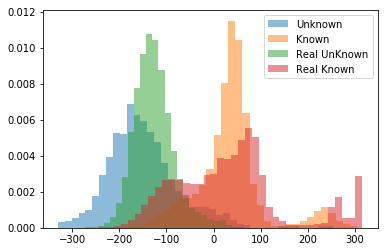

In [89]:
plt.hist(gmm.score_samples(emb_proj[lab == 1]), bins=40, normed=True, alpha=0.5, label='Unknown')
plt.hist(gmm.score_samples(emb_proj[lab != 1]), bins=40, normed=True, alpha=0.5, label='Known')
plt.hist(gmm.score_samples(emb_real_test_proj[lab_real_test ==1]), bins=40, normed=True, alpha=0.5, label='Real UnKnown')
plt.hist(gmm.score_samples(emb_real_test_proj[lab_real_test !=1]), bins=40, normed=True, alpha=0.5, label='Real Known')

plt.legend(loc=0)

In [95]:
tree_classification = -np.ones(len(emb_real_test_proj))
tree_classification = rf.predict(emb_real_test_proj)
bad = gmm.score_samples(emb_real_test_proj) < -170
tree_classification[bad] = 1
build_submission(tree_classification)


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    2.4s finished


In [96]:
np.sum(tree_classification == -1)

0